In [1]:
import dbcollection as dbc

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
import time

In [4]:
FLIC = dbc.load('flic')

In [5]:
FLIC.info()


> Set: test
   - height,           shape = (1016,),        dtype = int32,    (in 'object_ids', position = 4)
   - image_filenames,  shape = (1016, 100),    dtype = uint8,    (in 'object_ids', position = 0)
   - keypoint_names,   shape = (11, 15),       dtype = uint8     
   - keypoints,        shape = (1016, 11, 3),  dtype = float64,  (in 'object_ids', position = 2)
   - movienames,       shape = (1016, 31),     dtype = uint8     
   - object_fields,    shape = (5, 16),        dtype = uint8     
   - object_ids,       shape = (1016, 5),      dtype = int32     
   - torso_boxes,      shape = (1016, 4),      dtype = float64,  (in 'object_ids', position = 1)
   - width,            shape = (1016,),        dtype = int32,    (in 'object_ids', position = 3)

> Set: train
   - height,           shape = (3987,),        dtype = int32,    (in 'object_ids', position = 4)
   - image_filenames,  shape = (3987, 100),    dtype = uint8,    (in 'object_ids', position = 0)
   - keypoint_names,   shape =

In [5]:
def Visualize_FLIC(FLIC,Kind,Num):
    keypoint=FLIC.get(Kind,'keypoints')
    file_name=FLIC.get(Kind,'image_filenames')
    le=''
    test=keypoint[Num]
    for i in file_name[Num]:
        le=le+chr(i)
    img=cv2.imread(le)
    test=np.array(test,dtype=np.uint64)
    for i in test:
        cv2.putText(img, '*',(i[0],i[1]),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.2,(0,255,0))
    plt.imshow(img)

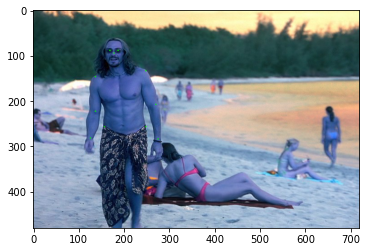

In [6]:
Visualize_FLIC(FLIC,'test',150)

In [40]:
def make_dataset_FLIC(FLIC,k):
    kp_data=FLIC.get(k,'keypoints')
    keypoint_name=FLIC.get(k,'keypoint_names')
    file_name=FLIC.get(k,'image_filenames')
    
    ###### Keypoint_Num and Name ########
    kp_name=[]
    for u in tqdm(range(11)):
        time.sleep(0.0000001)
        na=''
        for k in keypoint_name[u]:
            if k!=0:
                na=na+chr(k)
        kp_name.append(na)
        
    ######### Keypoint ##########
    
    
    ######### Image ############
    
    img_data=[]
    for i in tqdm(file_name):
        time.sleep(0.0000000001)
        le=''
        for j in i:
            if j != 0:
                le=le+chr(j)
        img=cv2.imread(le)
        img_data.append(img)
    img_data=np.array(img_data)
    kp_data=np.array(kp_data)
    kp_name=np.array(kp_name)
    return img_data, kp_data, kp_name

In [41]:
img_data, kp_data, kp_name=make_dataset_FLIC(FLIC,'train')

100%|██████████| 3987/3987 [00:14<00:00, 281.32it/s]


In [42]:
len(img_data), len(kp_data), len(kp_name)

(3987, 3987, 11)

In [43]:
img_data.shape

(3987, 480, 720, 3)

In [44]:
kp_data.shape

(3987, 11, 3)

In [45]:
kp_name=np.array(kp_name)

In [46]:
kp_name

array(['Left_Shoulder', 'Left_Elbow', 'Left_Wrist', 'Right_Shoulder',
       'Right_Elbow', 'Right_Wrist', 'Left_Hip', 'Right_Hip', 'Left_Eye',
       'Right_Eye', 'Nose'], dtype='<U14')

In [47]:
np.save('/home/lab/양창희/Pose Estimation/Dataset/FLIC/Train/Train_img_data.npy',img_data)

In [48]:
np.save('/home/lab/양창희/Pose Estimation/Dataset/FLIC/Train/Train_kp_data.npy',kp_data)

In [49]:
np.save('/home/lab/양창희/Pose Estimation/Dataset/FLIC/Train/Train_kp_name.npy',kp_name)

In [50]:
kk=np.load('/home/lab/양창희/Pose Estimation/Dataset/FLIC/Train/Train_kp_name.npy')

In [51]:
kk

array(['Left_Shoulder', 'Left_Elbow', 'Left_Wrist', 'Right_Shoulder',
       'Right_Elbow', 'Right_Wrist', 'Left_Hip', 'Right_Hip', 'Left_Eye',
       'Right_Eye', 'Nose'], dtype='<U14')

In [53]:
kk1=np.load('/home/lab/양창희/Pose Estimation/Dataset/FLIC/Test/test_kp_name.npy')

In [55]:
kk==kk1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])